In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
def analysis_graph(path):

    G = nx.read_edgelist(path, comments='#', nodetype=int)

    num_edges = len(G.edges)
    print('num_edges = ',num_edges)
    num_nodes = len(G.nodes)
    print('num_nodes = ',num_nodes)
    average_degree = (num_edges * 2) / num_nodes
    print('average_degree = ',average_degree)
    density = nx.density(G)
    print('density = ',density)

    if nx.is_connected(G) :
    
        diameter = nx.diameter(G)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G)
        print('average_shortest_path_length =',average_shortest_path_length )

    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_cc = G.subgraph(largest_cc)
        diameter = nx.diameter(G_cc)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G_cc)
        print('average_shortest_path_length =',average_shortest_path_length )

    avg_clustering = nx.average_clustering(G)
    print('avg_clustering = ',avg_clustering)
    transivity = nx.transitivity(G)
    print('transivity = ',transivity)
    assortativity = nx.degree_assortativity_coefficient(G)
    print('assortativity = ',assortativity)
    
    # calculate degree distribution
    degree_dist = sorted([d for n, d in G.degree()],reverse=True)
    sns.histplot(degree_dist,kde=True);
    

    # calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    degree_list = np.array(list(degree_centrality.values())) #attention: degress are normalized(/n-1)
    degree_centralization = np.sum(max(degree_list)-degree_list) / (num_nodes-2)  # sum(Cmax-Ci)/(n-1)(n-2)
    
    # calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    betweenness_list = np.array(list(betweenness_centrality.values())) #attention: betweenness are normalized(/n-1)
    betweenness_centralization = np.sum(max(betweenness_list)-betweenness_list) / (num_nodes-1)

    # calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    closeness_list = np.array(list(closeness_centrality.values())) #attention: betweenness are normalized(/(n-1))*2
    closeness_centralization = (np.sum(max(closeness_list)-closeness_list) * 2) / (num_nodes-1)

    # precise version for closeness_centralization
    # denom = (num_nodes-1)*(num_nodes-2)/(1+2*(num_nodes-2)) # for big num_nodes == (num_nodes-1)/2
    # closeness_centralization = np.sum(max(closeness_list)-closeness_list) / denom


    # calculate PageRank centrality
    pagerank_centrality = nx.pagerank(G)
    sorted_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)
    pagerank_list = np.array(list(pagerank_centrality.values())) # sum(pagerank_list)=1
    pagerank_centralization = np.sum(max(pagerank_list)-pagerank_list) / (num_nodes-1)


    # define a function to print the top nodes
    def print_top_nodes(nodes, metric_name):
        print()
        print(f'top 5 nodes {metric_name}')
        print('------------------')
        print('  node\tvalue')
        for item in nodes:
            print(f"{item[0]:5.0f}\t{item[1]:.4f}")
        

    # print top 5 nodes in 4 metrics
    print_top_nodes(sorted_degree[:5], 'degree')
    print_top_nodes(sorted_betweenness[:5], 'betweenness')
    print_top_nodes(sorted_closeness[:5] , 'closeness')
    print_top_nodes(sorted_pagerank[:5] , 'pagerank')

    # print centralization metrics
    print('\n centralization metrics ')
    print('----------------------------')
    print('degree_centralization = ',degree_centralization)
    print('betweenness_centralization = ',betweenness_centralization)
    print('closeness_centralization = ',closeness_centralization)
    print('pagerank_centralization = ',pagerank_centralization)


    
    

num_edges =  12534
num_nodes =  1858
average_degree =  13.491926803013994
density =  0.007265442543357024
diameter =  14
average_shortest_path_length = 3.452640184078649
avg_clustering =  0.1413864121675117
transivity =  0.09040338801314042
assortativity =  -0.08465913095969374

 top 5 centrality 
----------------------------
top_degree =  [(237, 0.1464728056004308), (238, 0.11954765751211631), (44, 0.09100700053850296), (168, 0.08292945611200861), (137, 0.07969843834141088)]
top_betweenness =  [(237, 0.07955057589298345), (137, 0.05961357357799316), (169, 0.053322850934625854), (238, 0.038630411641658105), (251, 0.035466794375009165)]
top_closeness =  [(237, 0.42158339409479156), (137, 0.4173880253671492), (238, 0.40452567972539516), (177, 0.3941413395628363), (176, 0.3941413395628363)]
top_pagerank =  [(237, 0.008589396194066411), (238, 0.0066425594028311), (169, 0.005840573934959892), (44, 0.00537472880670594), (137, 0.0048946317297857336)]

 centralization metrics 
----------------

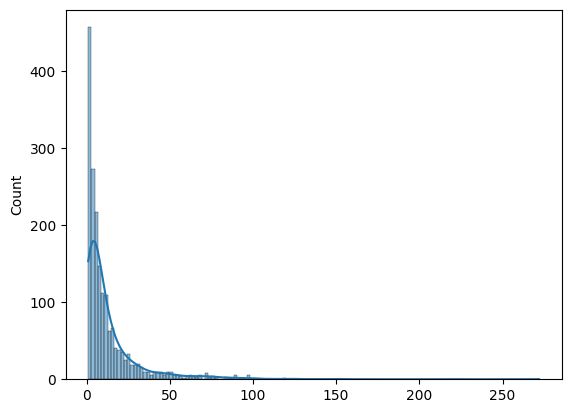

In [17]:
path = 'datasets\\friendships-hamster.txt'
analysis_graph(path)

num_edges =  88234
num_nodes =  4039
average_degree =  43.69101262688784
density =  0.010819963503439287
diameter =  8
average_shortest_path_length = 3.6925068496963913
avg_clustering =  0.6055467186200876
transivity =  0.5191742775433075
assortativity =  0.06357722918564943

 top 5 centrality 
----------------------------
top_degree =  [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]
top_betweenness =  [(107, 0.4805180785560152), (1684, 0.3377974497301992), (3437, 0.23611535735892905), (1912, 0.2292953395868782), (1085, 0.14901509211665306)]
top_closeness =  [(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796)]
top_pagerank =  [(3437, 0.0076145868447496), (107, 0.006936420955866117), (1684, 0.006367162138306824), (0, 0.006289602618466542), (1912, 0.003876971600884498)]

 centralization metrics 
-------------------

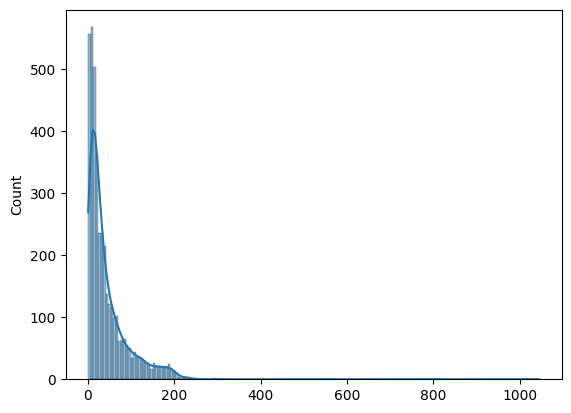

In [18]:
path = 'datasets\\facebook_combined.txt'
analysis_graph(path)

In [4]:
path = 'datasets\\Cit-HepTh.txt'
analysis_graph(path)

num_edges =  352324
num_nodes =  27770
average_degree =  25.374432841195535
density =  0.0009137683330762914
